# Load Libraries

First step is to load the required libraries.

In [ ]:
import numpy 

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense

from keras.utils import np_utils

from keras.datasets import mnist

# Load Dataset in Numpy Format

MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is.

The MNIST data is split into three parts: $60,000$ data points of training data, and $10,000$ points of test data. Each image is 28 pixels by 28 pixels.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

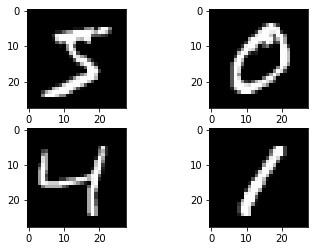

In [ ]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Formatting Data and Labels for Keras

We can flatten this array into a vector of $28\times28 = 784$ numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space. The data should always be of the format (Number of data points, data point dimension). In this case the training data will be of format $60,000\times784$.

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')

X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train / 255

X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)

y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

# Defining a single layer neural network model

Here we will define a single layer neural network. It will have a input layer of $784$ neurons, i.e. the input dimension and output layer of $10$ neurons, i.e. number of classes. The activation function used will be softmax activation.

In [ ]:
# create model

model = Sequential()

model.add(Dense(num_classes, input_dim=num_pixels, activation='softmax'))


# Compiling the model

Once the model is defined, we have to compile it. While compiling we provide the loss function to be used, the optimizer and any metric. Here we will use crossentropy loss with Adam optimizer and accuracy as a metric.

In [ ]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training/Fitting the model

Now the model is ready to be trained. We will provide training data to the network. Also we will specify the validation data, over which the model will only be validated.

In [ ]:
# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.8042 - accuracy: 0.8061 - val_loss: 0.4371 - val_accuracy: 0.8907
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4035 - accuracy: 0.8947 - val_loss: 0.3466 - val_accuracy: 0.9090
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.9066 - val_loss: 0.3166 - val_accuracy: 0.9139
Epoch 4/10
300/300 [==============================] - 1s 2ms/step - loss: 0.3189 - accuracy: 0.9129 - val_loss: 0.3005 - val_accuracy: 0.9169
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 0.3032 - accuracy: 0.9165 - val_loss: 0.2897 - val_accuracy: 0.9184
Epoch 6/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2927 - accuracy: 0.9191 - val_loss: 0.2810 - val_accuracy: 0.9224
Epoch 7/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2849 - accuracy: 0.9213 - val_loss: 0.2774 - val_accuracy: 0.9226
Epoch 

# Evaluating the model

Finally we will evaluate the model on the testing dataset.

In [ ]:
# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.2690 - accuracy: 0.9252
Baseline Error: 7.48%


# Defining a multi-layer model

Now we will define a multi layer neural network in which we will add $2$ hidden layers having $500$ and $100$ neurons.

In [ ]:
model = Sequential()

model.add(Dense(500, input_dim=num_pixels, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 4s 12ms/step - loss: 0.2707 - accuracy: 0.9222 - val_loss: 0.1276 - val_accuracy: 0.9614
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0980 - accuracy: 0.9707 - val_loss: 0.0920 - val_accuracy: 0.9700
Epoch 3/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0697 - val_accuracy: 0.9785
Epoch 4/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0673 - val_accuracy: 0.9782
Epoch 5/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.0624 - val_accuracy: 0.9808
Epoch 6/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0651 - val_accuracy: 0.9807
Epoch 7/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.0737 - val_accuracy: 0.9777